In [1]:
import math

from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

2024-01-29 13:25:19.213421: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-29 13:25:19.214954: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 13:25:19.236117: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 13:25:19.236140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 13:25:19.236719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# Simple Recurrent Neural Network - RNN
def create_RNN( hidden_units, dense_units, input_shape, activation ):
  # Create the model to train of Sequential type 
  model = Sequential()

  # add a SimpleRNN model with 'hidden units, input shape and the type of activation
  model.add(
    SimpleRNN( 
      hidden_units, 
      input_shape = input_shape, 
      activation = activation[0] 
    ) )
  
  # add Dense layers, with how many of them, and the type of activation
  model.add( 
    Dense( 
      units = dense_units, 
      activation = activation[1] 
      ) )
  
  # Compile the model with the loss function and the optimizer
  # in this case we use the mean squared error and the adam optimizer
  model.compile( 
    loss = 'mean_squared_error', 
    optimizer = 'adam' 
    )
  
  # return the model to train
  return model

In [3]:
def get_train_test( url, split_percent = 0.8 ):
  # Read the data from the url and get the second column of the data
  # or the column we want to predict and specify the engine to use
  df = read_csv( url, usecols=[1], engine='python' )

  # Convert the data to float32
  data = np.array(df.values.astype( 'float32' ) )

  # Normalize the data between 0 and 1
  scaler = MinMaxScaler(feature_range = ( 0, 1 ) )

  # Fit the data to the scaler and flatten the data
  data = scaler.fit_transform( data ).flatten()

  # Get the length of the data
  n = len( data )

  # Point for splitting data into train and test 
  split = int( n * split_percent )

  # Split the data into train and test
  train_data = data[ range( split ) ]
  test_data = data[ split: ]

  # return the train and test data
  return train_data, test_data, data

In [4]:
# Prepare the input X and target Y
# X is the input data and Y is the target data 
# time_steps is the number of time steps to use for the prediction 
# for example if we have 1000 data points and we want to predict the next 100
# dat is the data to use
def get_XY( dat, time_steps ):
  
  # Indices of target array
  # a range of numbers from time_steps to the end of the data 
  # with a step of time_steps
  Y_ind = np.arange( time_steps, len(dat), time_steps )
  # Get the target data
  Y = dat[Y_ind]

  # Prepare X 
  rows_x = len(Y)
  
  # Get the input data
  X = dat[range( time_steps * rows_x )]

  # Reshape the input data to be 3 dimensional
  X = np.reshape( X, ( rows_x, time_steps, 1 ) )
  return X, Y

In [5]:
# Print the Root Mean Square Error - RMSE
# trainY is the target data for the train set 
# testY is the target data for the test set 
# train_predict is the predicted data for the train set 
# test_predict is the predicted data for the test set
def print_error( trainY, testY, train_predict, test_predict ):
  # Error of predictions
  train_rmse = math.sqrt( mean_squared_error( trainY, train_predict ) )
  test_rmse = math.sqrt( mean_squared_error( testY, test_predict ) )
  # Print RMSE
  print( '\nTrain RMSE: %.3f RMSE' % ( train_rmse ) )
  print( '\nTest RMSE: %.3f RMSE' % ( test_rmse ) )

In [11]:
# Plot the result
# trainY is the target data for the train set
# testY is the target data for the test set
# train_predict is the predicted data for the train set
# test_predict is the predicted data for the test set
def plot_result( trainY, testY, train_predict, test_predict ):

  # Get the actual and predicted values
  actual = np.append( trainY, testY )

  # Get the actual and predicted values
  predictions = np.append( train_predict, test_predict )

  # Get the number of rows
  rows = len( actual )

  # Plot the actual and predicted values
  # and a vertical line to show the end of the train set
  plt.figure( figsize = ( 15, 6), dpi = 80 )
  plt.plot( range( rows ), actual )
  plt.plot( range( rows ), predictions )
  plt.axvline( x = len( trainY ), color = 'r' )
  plt.legend( ['Actual', 'Predictions'] )
  plt.xlabel( 'Observation number after given time steps' )
  plt.ylabel( 'Sunspots scaled' )
  plt.title( 'Actual and Predicted Values' )
  #plt.show(block = True)
  plt.show( block = None )

In [6]:
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
url = "/home/xamanek/PythonProjects/ML_Transformers_001/Datasets/monthly-sunspots.csv"
#url = "../../Datasets/monthly-sunspots.csv"

In [7]:
train_data, test_data, data = get_train_test( url )

print( '\n train_data.shape = ', train_data.shape )
print( '\n test_data.shape = ', test_data.shape )
print( '\n data.shape = ', data.shape )
print( '\n' )


 train_data.shape =  (2256,)

 test_data.shape =  (564,)

 data.shape =  (2820,)




In [9]:
time_steps = 12
trainX, trainY = get_XY( train_data, time_steps )
testX, testY = get_XY( test_data, time_steps )

#print( '\n Train X = ', trainX )
#print( '\n Train Y = ', trainY )
#print( '\n Test X = ', testX )
#print( '\n Test Y = ', testY )
#print( '\n' )

Epoch 1/20
187/187 - 1s - loss: 0.0122 - 637ms/epoch - 3ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0071 - 237ms/epoch - 1ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0056 - 330ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0051 - 226ms/epoch - 1ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0047 - 230ms/epoch - 1ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0044 - 216ms/epoch - 1ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0043 - 195ms/epoch - 1ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0043 - 332ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0040 - 460ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0039 - 327ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0040 - 160ms/epoch - 856us/step
Epoch 12/20
187/187 - 0s - loss: 0.0038 - 167ms/epoch - 891us/step
Epoch 13/20
187/187 - 0s - loss: 0.0039 - 199ms/epoch - 1ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0039 - 245ms/epoch - 1ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0038 - 192ms/epoch - 1ms/step
Epoch 16/20
187/187 - 0s - los

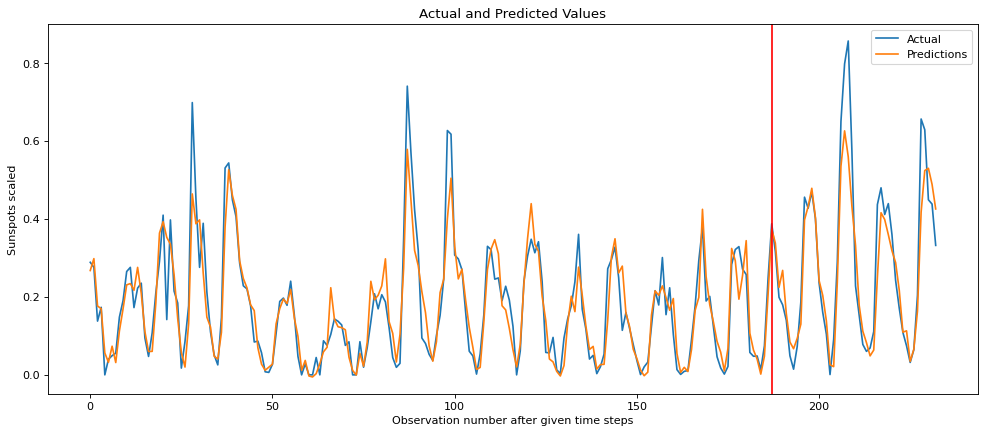

In [12]:
# Create the model
# hidden_units is the number of hidden units to use 
# dense_units is the number of dense units to use 
# input_shape is the shape of the input data 
# activation is the activation function to use
# in this case we use tanh for the hidden layer and tanh for the dense layer
model = create_RNN( 
  hidden_units = 3, 
  dense_units = 1, 
  input_shape = ( time_steps, 1 ), 
  activation = ['tanh', 'tanh'] 
  )

# Train the model
# trainX is the input data for the train set
# trainY is the target data for the train set
# epochs is the number of epochs to use for training
# batch_size is the batch size to use for training 
# verbose is the verbosity level to use for training
model.fit( 
  trainX, 
  trainY, 
  epochs = 20, 
  batch_size = 1, 
  verbose = 2 
  )

# Make predictions
train_predict = model.predict( trainX )
test_predict = model.predict( testX )

#Mean square error 
print_error( trainY, testY, train_predict, test_predict )

plot_result( trainY, testY, train_predict, test_predict )